### Outlier with IQR

In [39]:
import numpy as np
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = np.array([-200, 0, 2, 0, 1, 2, 3, 4, 3, 100, 150])

Q1, Q3 = np.quantile(data, [0.25, 0.75])

IQR = Q3 - Q1

Min_IQR = Q1 - IQR * 1.5
Max_IQR = Q3 + IQR * 1.5

In [3]:
data[(data < Min_IQR) | (data > Max_IQR)]

array([-200,  100,  150])

In [4]:
data[(data > Min_IQR) & (data < Max_IQR)]

array([0, 2, 0, 1, 2, 3, 4, 3])

### Multivariate

In [6]:
def get_boston_data():
    boston = load_boston()
    df = pd.DataFrame(boston.data)
    df.columns = boston.feature_names
    target = pd.DataFrame(boston.target, columns=['PRICE'])
    df = pd.concat([df, target], axis=1)
    return df

In [8]:
df = get_boston_data()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [11]:
for col in df.columns:
    if col == 'PRICE':
        continue
        
    Q1, Q3 = np.quantile(df[col], [0.25, 0.75])
    
    IQR = Q3 - Q1
 
    Max_IQR = Q3 + 1.5 * IQR
    Min_IQR = Q1 - 1.5 * IQR
 
    df.loc[df[col] < Min_IQR, col] = np.nan
    df.loc[df[col] > Max_IQR, col] = np.nan

In [12]:
df.isna().sum()

CRIM       66
ZN         68
INDUS       0
CHAS       35
NOX         0
RM         30
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO    15
B          77
LSTAT       7
PRICE       0
dtype: int64

### Multivariate (IQR + Z-Score)

In [13]:
df = get_boston_data()

In [14]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [15]:
# Standardization
# (x - mean) / std

for col in df.columns:
    if col == 'PRICE':
        continue
    df[col] = (df[col] - np.mean(df[col])) / np.std(df[col])

In [16]:
for col in df.columns:
    if col == 'PRICE':
        continue
        
    Q1, Q3 = np.quantile(df[col], [0.25, 0.75])
    
    IQR = Q3 - Q1
 
    Max_IQR = Q3 + 1.5 * IQR
    Min_IQR = Q1 - 1.5 * IQR
    
    STD = np.std(df[col])
    
    Max_STD = 3 * STD
    Min_STD = -3 * STD
 
    df.loc[(df[col] < Min_IQR) & (df[col] < Min_STD), col] = np.nan
    df.loc[(df[col] > Max_IQR) & (df[col] > Max_STD), col] = np.nan

In [17]:
df.isnull().sum()

CRIM        8
ZN         14
INDUS       0
CHAS       35
NOX         0
RM          8
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO     0
B          25
LSTAT       5
PRICE       0
dtype: int64

### Fill Na's

In [18]:
df = df.fillna(df.mean())

In [19]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

### Min-Max Scaler

(x - min) / (max - min)

In [43]:
df = get_boston_data()

for col in df.columns:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

### Log Scaler

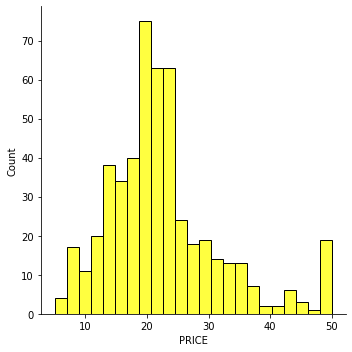

In [45]:
price = get_boston_data()['PRICE']
sns.displot(price, color='yellow')

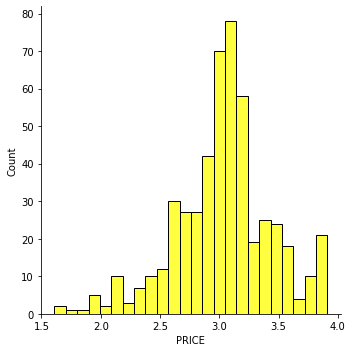

In [46]:
price = np.log(price)
sns.displot(price, color='yellow')

### Cut Data

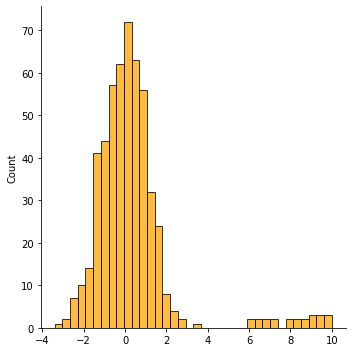

In [47]:
data = np.random.normal(0, 1, 500)
for out in np.linspace(6, 10, 10):
    for _ in range(int(out ** 0.5)):
        data = np.append(data, out)

sns.displot(data, color='orange')

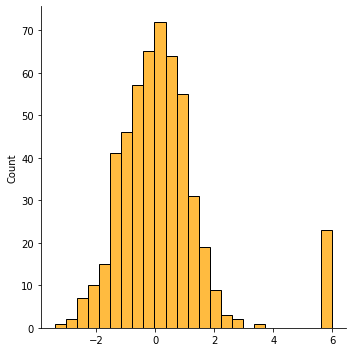

In [48]:
STD = np.std(data)
Max_STD = 3 * STD
Min_STD = -3 * STD

data[(data > Max_STD)] = Max_STD

sns.displot(data, color='orange')

### Skewness

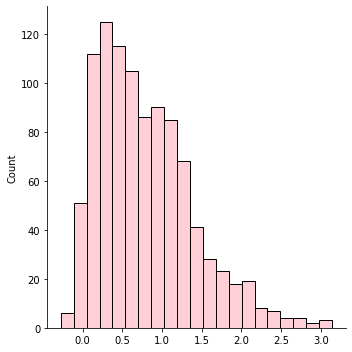

In [52]:
skew_data = stats.skewnorm(10).rvs(1000)

sns.displot(skew_data, color='pink')

In [53]:
stats.skew(skew_data)

0.9316352050982761

In [54]:
Q1, Q2, Q3 = np.quantile(skew_data, [0.25, 0.50, 0.75])

IQR = Q3 - Q1

skew_IQR = ((Q3 - Q2) - (Q2 - Q1)) / IQR

skew_IQR

0.11373703288987934

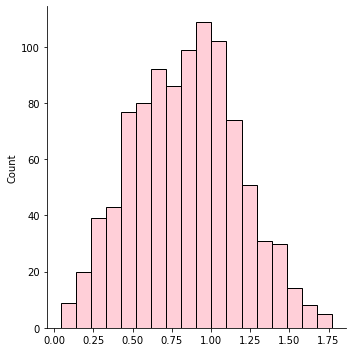

In [58]:
norm_skew_data = skew_data ** (1/2)

sns.displot(norm_skew_data, color='pink')